In [2]:
import pandas as pd
from pybaseball import pitching_stats
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
stat23 = pitching_stats(2023,qual=5)
stat24 = pitching_stats(2024,qual=5)

In [137]:
def reformat_name(name):
    parts = name.split()
    if len(parts) == 3:
        first, middle, last = parts
        return f"{middle} {last}, {first}"
    if len(parts) == 2:
        first, last = parts
        return f"{last}, {first}"
    


stat23['Name'] = stat23['Name'].apply(reformat_name)
stat24['Name'] = stat24['Name'].apply(reformat_name)

stat23 = stat23.rename(columns={
    'Name': 'player_name'
})

stat24 = stat24.rename(columns={
    'Name': 'player_name'
})

In [138]:
scores = pd.read_csv("pitch_scores.csv")


In [140]:
stat23 = stat23[['player_name','FIP']]
stat24 = stat24[['player_name','FIP']]

In [141]:
joined_data_23 = stat23.merge(scores,how='left',on='player_name')
joined_data_23.dropna()

joined_data_24 = stat24.merge(scores,how='left',on='player_name')
joined_data_24

,player_name,FIP,overall,fastball,sinker,cutter,slider,sweeper,curveball,changeup,splitter
0,"Houck, Tanner",2.22,95.91,97.49,101.73,70.45,97.30,0.00,0.00,0.00,98.67
1,"Skubal, Tarik",2.20,103.02,103.92,101.62,0.00,101.91,0.00,98.32,104.65,0.00
2,"Ragans, Cole",2.32,104.19,104.55,0.00,101.76,102.95,0.00,105.78,104.64,0.00
3,"Suarez, Ranger",2.62,99.77,96.96,101.38,101.87,98.69,0.00,99.25,99.71,0.00
4,"Sale, Chris",2.33,100.08,97.61,101.18,0.00,104.08,0.00,0.00,96.17,0.00
...,...,...,...,...,...,...,...,...,...,...,...
535,"Jarvis, Bryce",5.68,98.80,96.94,93.48,0.00,100.62,0.00,95.29,103.89,0.00
536,"Hendricks, Kyle",6.37,94.77,95.25,96.04,0.00,0.00,0.00,98.03,93.18,0.00
537,"Gallegos, Giovanny",9.82,100.27,96.88,0.00,0.00,104.00,0.00,0.00,99.63,0.00
538,"Alzolay, Adbert",7.36,99.96,98.38,99.91,99.56,100.53,102.52,0.00,99.82,0.00


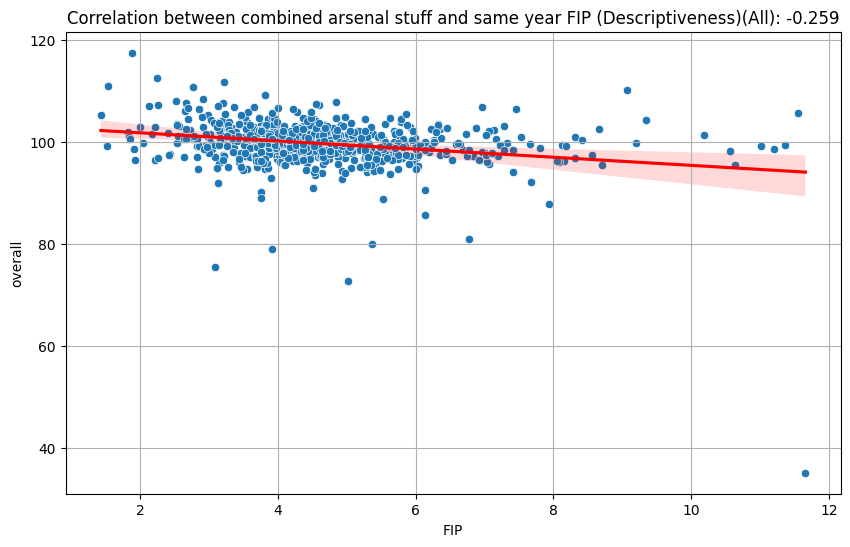

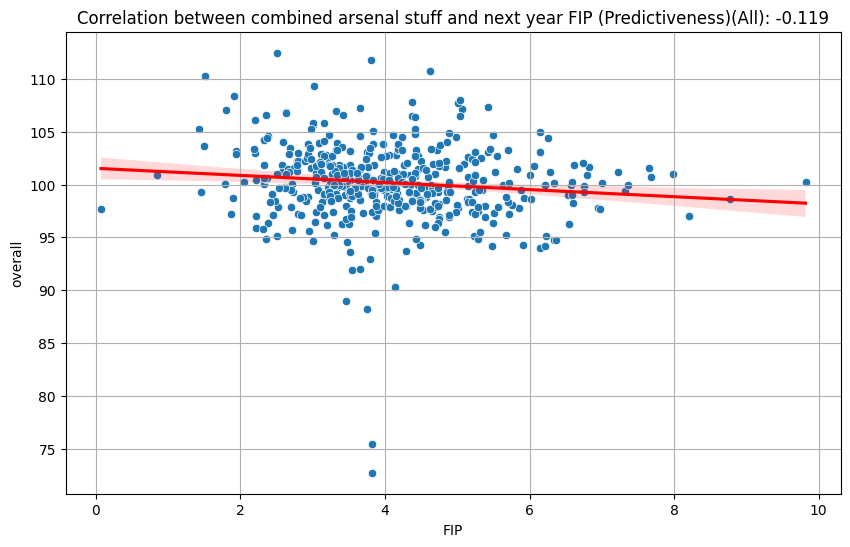

In [142]:
def filter_pitch(df, pitch):
    return df[df[pitch]>0]

stat = 'FIP'
pitch = 'overall'

filtered_data_23 = filter_pitch(joined_data_23, pitch)
filtered_data_24 = filter_pitch(joined_data_24, pitch)

correlation_23 = filtered_data_23[stat].corr(filtered_data_23[pitch])
correlation_24 = filtered_data_24[stat].corr(filtered_data_24[pitch])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat, y=pitch, data=filtered_data_23)
sns.regplot(x=stat, y=pitch, data=filtered_data_23, scatter=False, color='red')
plt.title(f"Correlation between combined arsenal stuff and same year FIP (Descriptiveness)(All): {correlation_23:.3f}")
plt.grid(True)
#plt.show()
plt.savefig('descriptive.png')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat, y=pitch, data=filtered_data_24)
sns.regplot(x=stat, y=pitch, data=filtered_data_24, scatter=False, color='red')
plt.title(f"Correlation between combined arsenal stuff and next year FIP (Predictiveness)(All): {correlation_24:.3f}")
plt.grid(True)
#plt.show()
plt.savefig('predictive.png')
